## Introduction

This mini-project is directed at exploring how to anaylyse text data. I have always found this aspect of data analysis unique and somewhat magical. I have often thought to myself: how do you make sense of words, sentences,  and paragraphs with math?

This thought have always hunted me until I recently started stydying Python's Natural Language Processing Tool Kit and its application.
To this end this project is more of getting my feet wet in the verse world of text analysis.

### Data
The data used for this project is the *Independence Day Celebration* speeches which President Muhammadu Buhari has given since he took the mantle of leadership in the most populous country of Africa:Nigeria. The speeches were scraped off the internet, specifically from the pages of online newspapers and blogs. Webscraping is another important skillset which exposition and value in the data analysis process would be a topic of a different project.


In [14]:
! pip install wordcloud

In [15]:
# import necessary packages
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
lemma = WordNetLemmatizer()
my_stop=set(stopwords.words('english'))
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nbuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})


In [17]:
#load data
speeches = pd.read_csv('data/buhari_indep_speech2015-2019.csv')

In [18]:
speeches.head()

,year,body_speech,headline
0,2015,October 1st is a day for joy and celebrations ...,Full Text Of The 55th Independence Anniversary...
1,2016,1st October is a day of celebration for us Nig...,Full Text Of The 56th Independence Anniversary...
2,2017,1st remains a special date for all Nigerians a...,Full Text Of The 57th Independence Anniversary...
3,2018,"Fellow Nigerians, Today is a day of celebratio...",Full Text Of The 58th Independence Anniversary...
4,2019,"Dear Compatriots, 1st October each year is an ...",Full Text Of The 59th Independence Anniversary...


In [19]:
#the 2015 independence speech
speech_2015 = speeches.loc[0, 'body_speech']
speech_2015

'October 1st is a day for joy and celebrations for us Nigerians whatever the circumstances we find ourselves in because it is the day, 55 years ago; we liberated ourselves from the shackles of colonialism and began our long march to nationhood and to greatness. No temporary problems or passing challenges should stop us from honoring this day. Let us remind ourselves of the gifts God has given us. Our Creator has bequeathed to us Numbers – Nigeria is the ninth most populated country on the planet. We have in addition: · Arable land · Water · Forests · Oil and gas · Coastline · Solid minerals We have all the attributes of a great nation. We are not there yet because the one commodity we have been unable to exploit to the fullest is unity of purpose. This would have enabled us to achieve not only more orderly political evolution and integration but also continuity and economic progress. Countries far less endowed have made greater economic progress by greater coherence and unity of purpos

In [20]:
#Number of words in the speech
len(speech_2015)

6425

In [21]:
#tokenize, lemmatize and make the speech free of stop words
tok_speech_2015 = []
tokenizer.tokenize(speech_2015)
for word in tokenizer.tokenize(speech_2015.lower()):
    tok_speech_2015.append(word)
#tok_spy = ' '.join(tok_speech_2015)
print(tok_speech_2015)

    

['october', '1st', 'is', 'a', 'day', 'for', 'joy', 'and', 'celebrations', 'for', 'us', 'nigerians', 'whatever', 'the', 'circumstances', 'we', 'find', 'ourselves', 'in', 'because', 'it', 'is', 'the', 'day', '55', 'years', 'ago', 'we', 'liberated', 'ourselves', 'from', 'the', 'shackles', 'of', 'colonialism', 'and', 'began', 'our', 'long', 'march', 'to', 'nationhood', 'and', 'to', 'greatness', 'no', 'temporary', 'problems', 'or', 'passing', 'challenges', 'should', 'stop', 'us', 'from', 'honoring', 'this', 'day', 'let', 'us', 'remind', 'ourselves', 'of', 'the', 'gifts', 'god', 'has', 'given', 'us', 'our', 'creator', 'has', 'bequeathed', 'to', 'us', 'numbers', 'nigeria', 'is', 'the', 'ninth', 'most', 'populated', 'country', 'on', 'the', 'planet', 'we', 'have', 'in', 'addition', 'arable', 'land', 'water', 'forests', 'oil', 'and', 'gas', 'coastline', 'solid', 'minerals', 'we', 'have', 'all', 'the', 'attributes', 'of', 'a', 'great', 'nation', 'we', 'are', 'not', 'there', 'yet', 'because', 'the

In [22]:
# remove the stop words and lemmmatize
clean_speech_2015 = []
for word in tok_speech_2015:
    if word in my_stop:
        continue
    else:
        clean_speech_2015.append(word)
print(clean_speech_2015)

['october', '1st', 'day', 'joy', 'celebrations', 'us', 'nigerians', 'whatever', 'circumstances', 'find', 'day', '55', 'years', 'ago', 'liberated', 'shackles', 'colonialism', 'began', 'long', 'march', 'nationhood', 'greatness', 'temporary', 'problems', 'passing', 'challenges', 'stop', 'us', 'honoring', 'day', 'let', 'us', 'remind', 'gifts', 'god', 'given', 'us', 'creator', 'bequeathed', 'us', 'numbers', 'nigeria', 'ninth', 'populated', 'country', 'planet', 'addition', 'arable', 'land', 'water', 'forests', 'oil', 'gas', 'coastline', 'solid', 'minerals', 'attributes', 'great', 'nation', 'yet', 'one', 'commodity', 'unable', 'exploit', 'fullest', 'unity', 'purpose', 'would', 'enabled', 'us', 'achieve', 'orderly', 'political', 'evolution', 'integration', 'also', 'continuity', 'economic', 'progress', 'countries', 'far', 'less', 'endowed', 'made', 'greater', 'economic', 'progress', 'greater', 'coherence', 'unity', 'purpose', 'nonetheless', 'remained', 'together', 'achievement', 'appreciate', '

In [23]:
from wordcloud import WordCloud
senty_2015 = ' '.join(clean_speech_2015)
print(senty_2015)

october 1st day joy celebrations us nigerians whatever circumstances find day 55 years ago liberated shackles colonialism began long march nationhood greatness temporary problems passing challenges stop us honoring day let us remind gifts god given us creator bequeathed us numbers nigeria ninth populated country planet addition arable land water forests oil gas coastline solid minerals attributes great nation yet one commodity unable exploit fullest unity purpose would enabled us achieve orderly political evolution integration also continuity economic progress countries far less endowed made greater economic progress greater coherence unity purpose nonetheless remained together achievement appreciate try consolidate witnessed year sea change democratic development fact opposition party replaced entrenched government free fair election indicative deeper roots democratic system whatever one views nigerians must thank former president jonathan digging face defeat thereby saving country un

(-0.5, 399.5, 199.5, -0.5)

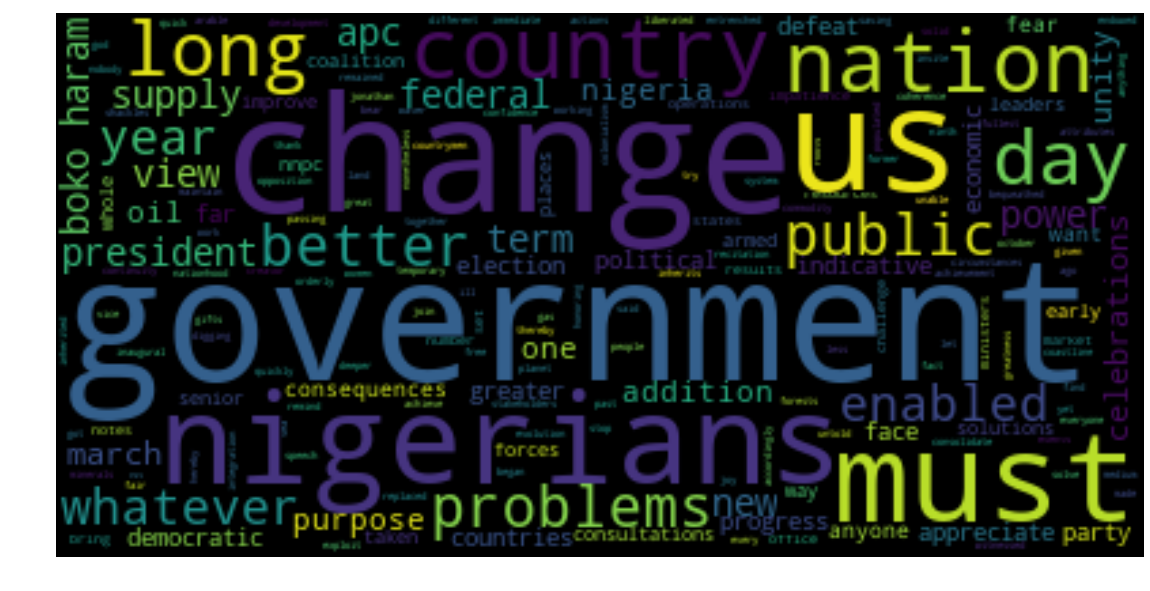

In [24]:
cloudy_speech = WordCloud().generate(senty_2015)
plt.imshow(cloudy_speech, interpolation= 'bilinear')
plt.axis('off')

In [25]:
#put everything in a function
def buhari_speech_tokenize(speech_number, speech_body = 'body_speech'):
    a_apeech = speeches.loc[speech_number, speech_body]
    speech_list = []
    tokky_speech = tokenizer.tokenize(a_apeech.lower())
    for word in tokky_speech:
        if word in my_stop:
            continue
        else:
            speech_list.append(word)
    stringy_speech = ' '.join(speech_list)
    cloudy_speech = WordCloud().generate(stringy_speech)
    plt.imshow(cloudy_speech, interpolation= 'bilinear')
    return plt.axis('off')
    

(-0.5, 399.5, 199.5, -0.5)

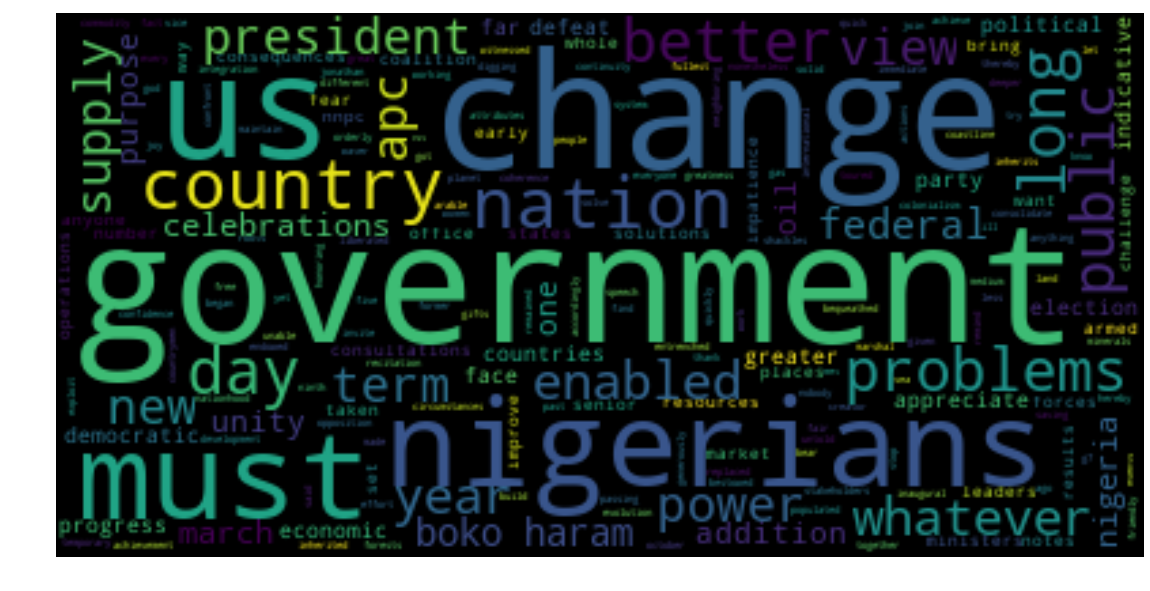

In [26]:
# 2015 speech, common words in the speech
buhari_speech_tokenize(0)

(-0.5, 399.5, 199.5, -0.5)

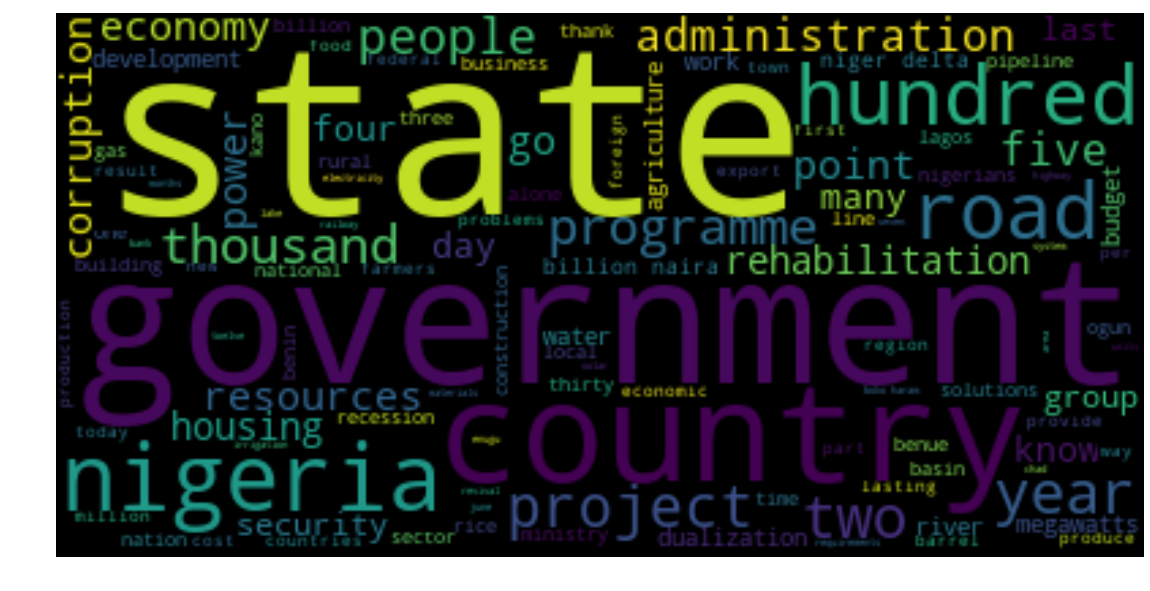

In [27]:
# 2016 speech, common words in the speech
buhari_speech_tokenize(1)

(-0.5, 399.5, 199.5, -0.5)

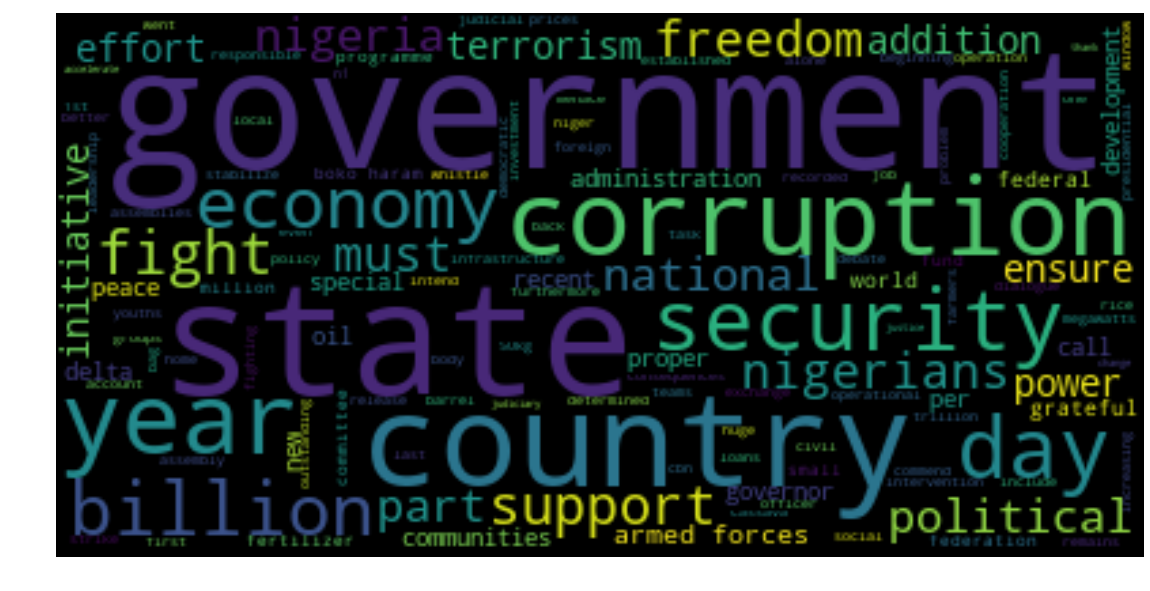

In [28]:
# 2017 speech, common words in the speech
buhari_speech_tokenize(2)

(-0.5, 399.5, 199.5, -0.5)

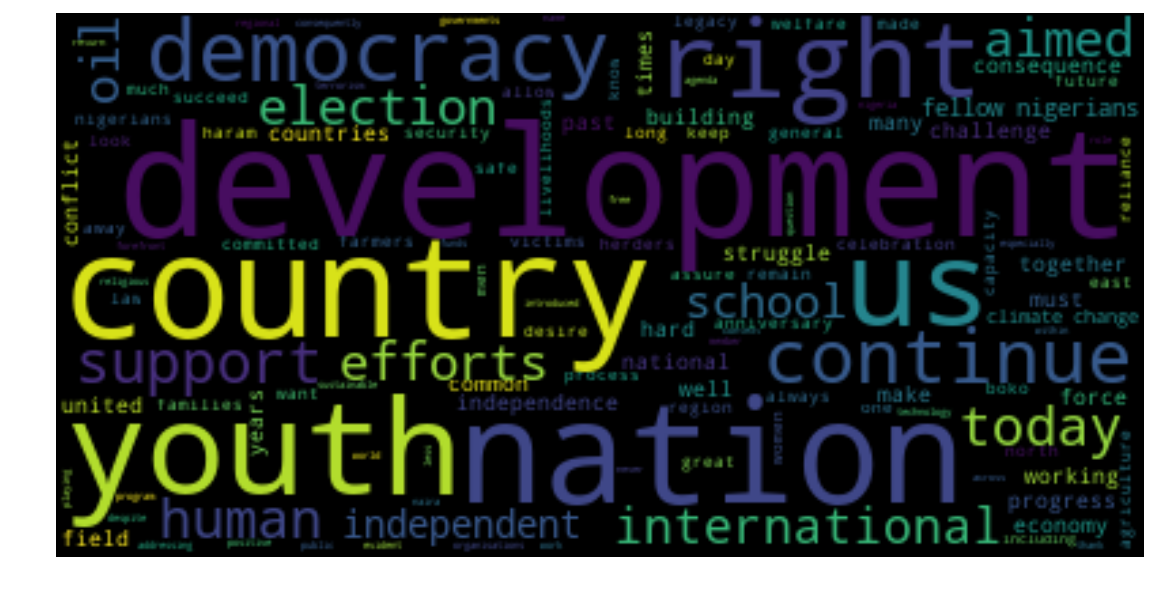

In [29]:
# 2018 speech, common words in the speech
buhari_speech_tokenize(3)

(-0.5, 399.5, 199.5, -0.5)

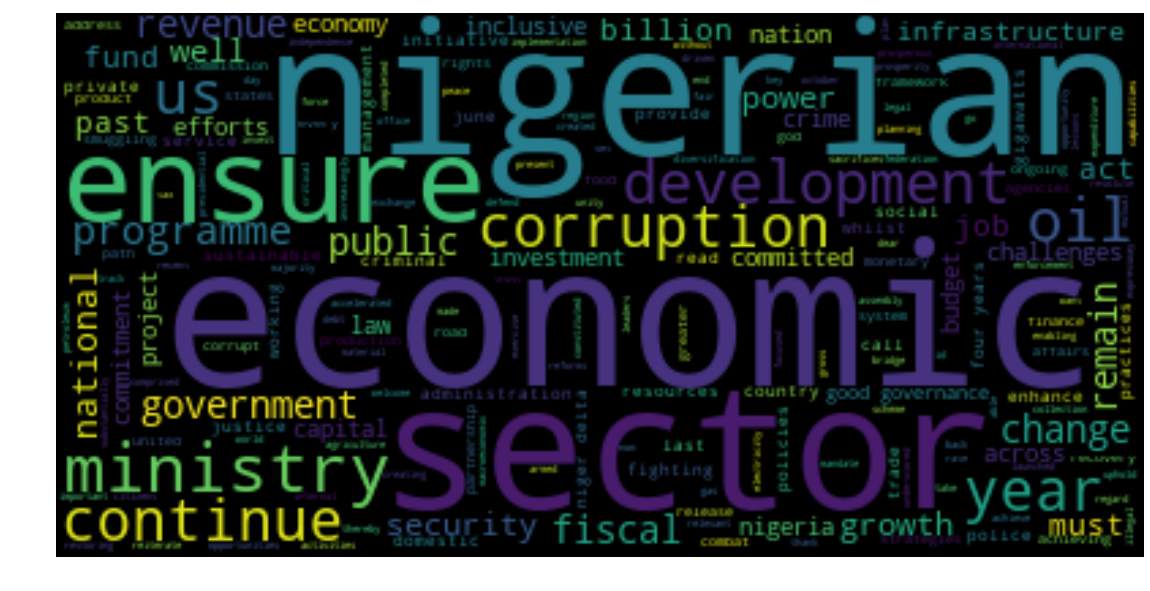

In [30]:
# 2019 speech, common words in the speech
buhari_speech_tokenize(4)

### Conclusion and future improvement
While I may have achieved the objective of this project; it would have been more robust with:
 * Comparative analysis of the speeches with the speeches of other Nigerian presidents
 * Develope a framework that would classify a speech as either sensitive or insensitive based on the  philosophical significance of independence(applying machine learning)